# How do I optimize promotions placement on an e-commerce website?

## Introduction

**Business Context.** In the wake of Egan Bernal's victory at the Tour de France in 2019, you've decided to launch an online cycling store in Colombia. Unsurprisingly, it's very popular. Now that you have a sizable user base, you want to launch promotions on your website. However, targeting users effecively is a complex task, and you would like to build a system that can handle this for you.

**Business Problem.** Your task is to **build an automated promotion system that learns user behavior by itself so that it can serve targeted ads to each user**.

**Analytical Context.** The case will proceed as follows: you will (1) learn some background information on **reinforcement learning**; (2) implement a reinforcement learning algorithm in a simple game; (3) discuss and analyze the benefits & shortcomings of this method; and finally (4) implement the algorithm in a more complex setting.

## Basics of reinforcement learning

The key idea behind **reinforcement learning (RL)** is the use of outcomes (rewards or punishments) to guide something in learning the optimal thing to do. It is very similar to training a dog. When the dog does something you like, you give it a treat. When it does something bad, you say "bad dog". Through trial and error, the dog eventually learns what it ought to do.

RL algorithms are best suited to settings where you have access to an "environment" which you can interact with at little to no cost to you. For example, these techniques are used in AlphaGo/AlphaZero to beat the best humans in the world at games, since letting computers play games against themselves or other humans has very little cost. On the other hand, these techniques are bad for things like the stock market because there is a real cost to you when the algorithm makes a bad trade.

![Reinforcement Learning Diagram](reinforcement_learning_img.jpeg)

The diagram above outlines the basic structure of RL algorithms. You have an agent (your algorithm) which gets to pick an action $A$ that changes the environment; it then receives a reward $R$ and sees its next state $S$. The process repeats itself until the session is over. In this particular example:

1. $S$: The current location of the dinosaur in the maze
2. $A$: up, left, right, down (as long as there is no wall in that direction)
3. $R$: +100 if the dinosaur reaches the tree, otherwise 0 (or maybe -1 if you lose points for taking more steps)

### $Q$-Learning

**$Q$-Learning** is just a particular implementation of reinforcement learning. It requires the same 3 things – $S$, $A$, and $R$. The algorithm works by keeping track of a matrix (usually denoted $Q$), which has a number of rows equal to the number of possible states, and a number of columns equal to the number of possible actions. Each entry in the matrix is the value of picking the corresponding action from the corresponding particular state.

When we first start $Q$-Learning, we do not know anything about rewards, so we initialize the matrix to be 0's everywhere. After every step/action, the agent receives a reward and we update $Q$ according to the following equation:

![Q-Learning Update](q_learning_eq.png)

What is this saying? It is saying that we update the value of picking action $a_t$ in state $s_t$ as some weighting of its previous value and the reward plus the discounted expected value of the next state we will be in, provided we act optimally. What about those hyperparameters? If $\alpha=0$, then we never take rewards into account (i.e. we never learn). If $\alpha=1$, then we always update to the value of the new reward plus the discounted expected value of the next state. We call $\alpha$ the learning rate as it is the rate that it accepts new information. The explanation behind $\gamma$ is a bit more complicated. Imagine replacing the $Q(s_{t+1},a)$ term with its update step. Then you would get a $\gamma^2 Q(s_{t+2},a)$ term. If you keep doing this, you will see that the update step includes information far into the future. However, the future is uncertain and so it should be discounted so that it doesn't overpower our current rewards. Thus, we call $\gamma$ the discount factor.

In the dinosaur example, the $Q$ matrix might look like:

| S\A|Up|Down|Left|Right|
|---|---|---|---|---|
|location 0,0 | 0 | 10 | 0 | 5 |
|location 0,1 | 0 | 9 | 0 | 5 |
| ... | ... | ... | ... | ... |
|Left and up of tree | 5 | 10 | 5 | 10 |
|Directly left of tree | 10 | 0 | 10 | 50 |

### Exercise 1:

What is the update step for the $Q$ matrix if you are directly left of the tree and move right? What about up? Use $ \alpha=0.5$ and $\gamma=1$. Use the $Q$ matrix above and the rewards +100 for reaching the tree and 0 for everything else.

**Answer.**

---------

## A toy example

To see $Q$-Learning in action, let's play a simple game. In this game, we are a cat and are trying to catch a mouse on a 2D grid. (Think of this as a cat chasing a mouse around a barn.) The mouse starts in the middle and moves randomly around the grid. The cat successfully catches the mouse when their $x$ and $y$ coordinates match.

### Exercise 2:

If the grid is 11 x 11, how would you represent $S$, $A$, and $R$? What is the dimension of the matrix $Q$?

**Answer.**

---------

### Setting up the environment

The core part of every RL project is setting up the environment for your agent. The environment is absolutely crucial - without it, there is no concept of state, actions, or rewards, and your agent has nothing to interact with.

In most cases, you want to train your agent in an environment that doesn't cost you money if it makes a mistake. Thus, you need to make a simulation of the real world. Sometimes, it is easy to simulate. Other times, it is difficult. If it is too difficult, then you **need** to let the agent spend at least some time training in the real world. The real world then becomes your environment, so any agent mistake is costly to you. So it is important to carefully monitor and limit your agent's interaction with the real world.

For this game, we'll start by just generating random behavior for the cat and the mouse:

In [1]:
%matplotlib notebook
from random import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
import time

# Must be odd for the game to be solvable
grid_size = 9

class Environment():
    
    fig, ax = None, None
    
    def reset(self, cat, mouse):
        cat.x = 0
        cat.y = 0
        mouse.x = grid_size//2
        mouse.y = grid_size//2
        self.fig, self.ax = None, None
    
    def get_possible_moves(self, x, y):
        possible_moves = []
        if x < grid_size-1:
            possible_moves.append(0)
        if y < grid_size-1:
            possible_moves.append(1)
        if x > 0:
            possible_moves.append(2)
        if y > 0:
            possible_moves.append(3)
            
        return possible_moves
    
    def print_state(self,cat, mouse):
        
        if self.fig is None:
            self.fig, self.ax = plt.subplots(figsize=(8,8))
        
        cat_img = mpimg.imread('./cat.png')
        mouse_img = mpimg.imread('./mouse.png')
        
        icon_size = 50
        
        self.ax.clear()
        self.ax.imshow(mouse_img, extent=[mouse.x*icon_size, (mouse.x+1)*icon_size, mouse.y*icon_size, (mouse.y+1)*icon_size])
        self.ax.imshow(cat_img, extent=[cat.x*icon_size, (cat.x+1)*icon_size, cat.y*icon_size, (cat.y+1)*icon_size])
        self.ax.set_ylim([0, grid_size*icon_size])
        self.ax.set_xlim([0, grid_size*icon_size])
        
        grid_lines = [50*x for x in range(grid_size)]
        self.ax.xaxis.set_ticks(grid_lines)
        self.ax.yaxis.set_ticks(grid_lines)
        self.ax.grid()
        self.ax.xaxis.set_ticklabels([])
        self.ax.yaxis.set_ticklabels([])
        self.fig.canvas.draw()

class BlindCat():
    
    def __init__(self, e):
        self.e = e
        
    def move(self):
        # each move should be U,D,L,R
        possible_moves = self.e.get_possible_moves(self.x, self.y)
        idx = round(random()*(len(possible_moves)-1))
        move = possible_moves[idx]
        
        direction = 1 if move < 2 else -1
        
        if move % 2 == 0:
            self.x += direction
        else:
            self.y += direction
        
class Mouse():
    
    def __init__(self, e):
        self.e = e
        
    def move(self):
        # each move should be U,D,L,R
        # at the boundaries, it should be reflected
        possible_moves = self.e.get_possible_moves(self.x, self.y)
        idx = round(random()*(len(possible_moves)-1))
        move = possible_moves[idx]
        
        direction = 1 if move < 2 else -1
        
        if move % 2 == 0:
            self.x += direction
        else:
            self.y += direction

<IPython.core.display.Javascript object>


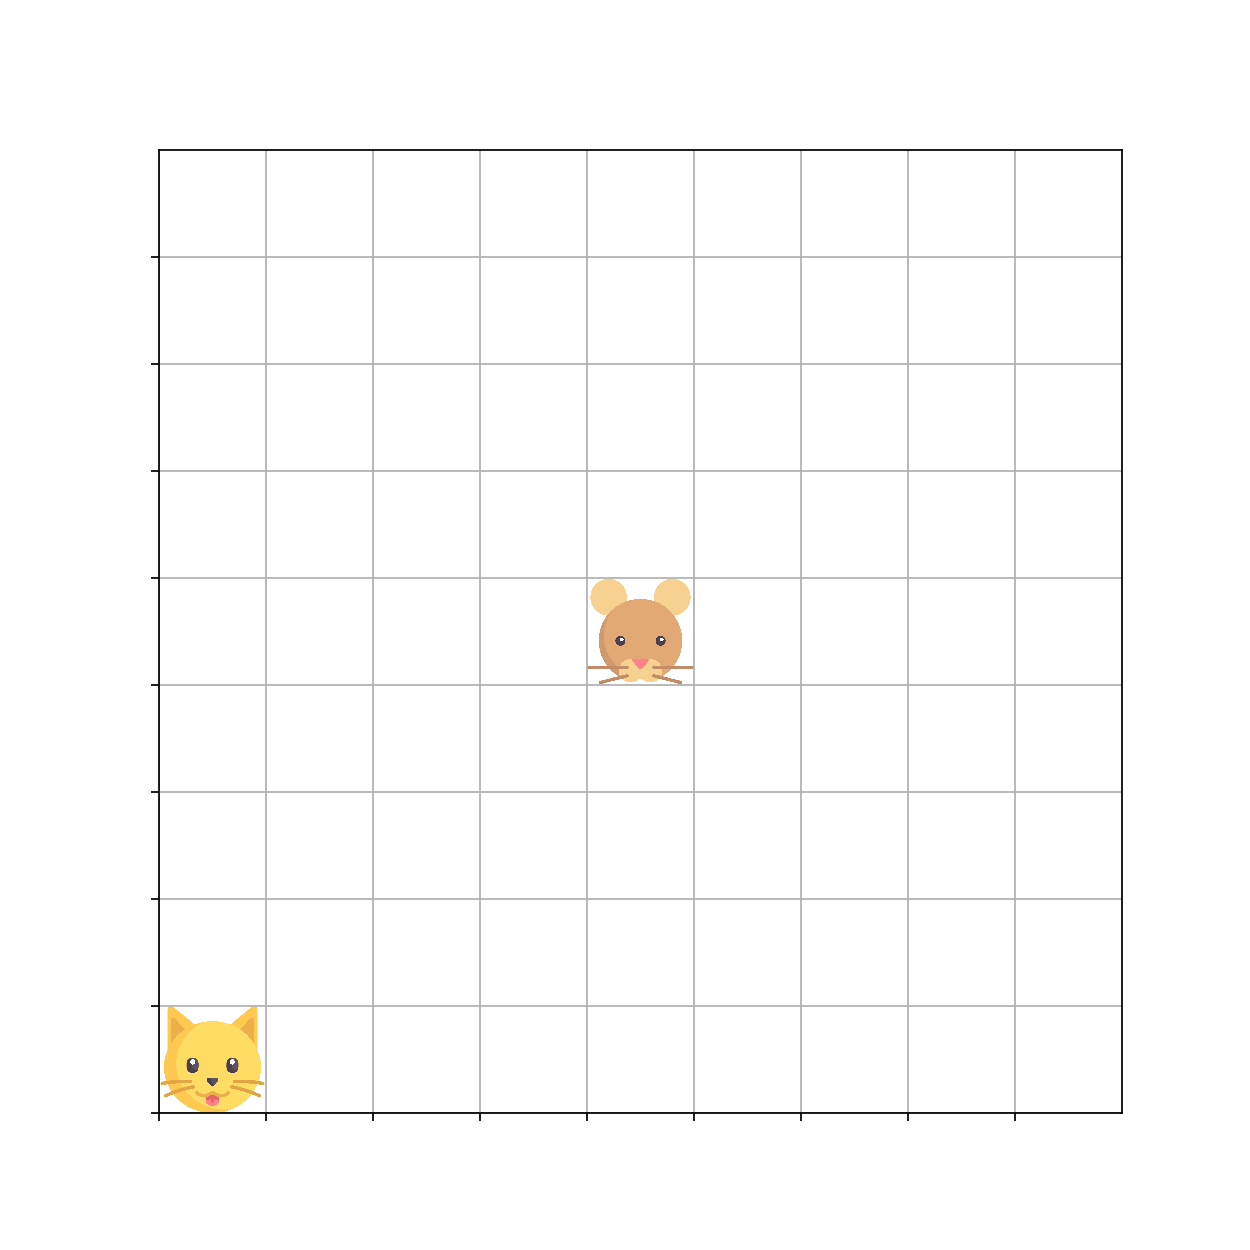

In [2]:
e = Environment()
cat = BlindCat(e)
mouse = Mouse(e)
e.reset(cat, mouse)

e.print_state(cat, mouse)

### Exercise 3:

Write code to visually simulate this game until the cat catches the mouse.

**Answer.**

---------

### A $Q$-Learning cat

Now that our simulator is working, let's upgrade it to have an intelligent cat. Look at the updated `cat.move()` funtion below - it now uses the mouse's location to guide its choices. It also has the $Q$-Learning algorithm implemented except for the udpate step.

In this example, we have defaulted to $\alpha = 0.9$ and $\gamma = 0.95$. The cat accepts a rewards matrix that you have to specify (after which we will see the effects of changing the rewards). You will also notice a comment about an **$\epsilon$-greedy** strategy. This is because in RL, we need the agent to explore during training. This is where the cost of training comes from!

In [3]:
import numpy as np

class Cat():
    
    def __init__(self, R, e):
        self.e = e
        
        self.R = R
        assert(R.shape == (grid_size, grid_size, grid_size, grid_size))
        self.Q = np.zeros((grid_size, grid_size, grid_size, grid_size, 4))
        self.alpha = 0.9
        self.gamma = 0.95
        self.epsilon = 0.05
        
    def move(self, mouse):
        state = [self.x, self.y, mouse.x, mouse.y]
        max_value = -np.inf
        action = None
        
        # epsilon greedy strategy
        greedy = np.random.choice([True, False], p=[1-self.epsilon, self.epsilon])
        
        if greedy:
            for i in self.e.get_possible_moves(self.x, self.y):

                Q_idx = tuple(state.copy()+[i])            
                value = self.Q[Q_idx]

                if value > max_value:
                    max_value = value
                    action = i
        else:
            action = np.random.choice(self.e.get_possible_moves(self.x, self.y))
                
        state_new = state.copy()
            
        if action == 0:
            state_new[0] += 1
        elif action == 1:
            state_new[1] += 1
        elif action == 2:
            state_new[0] -= 1
        elif action == 3:
            state_new[1] -= 1
            
        next_Q_idx = tuple(state_new) 
        R_idx = tuple(state_new)
                
        # update the Q matrix
        Q_idx = tuple(state.copy()+[action])
        self.Q[Q_idx] = 0# MODIFY UPDATE STEP HERE
        
        if action == 0:
            self.x += 1
        elif action == 1:
            self.y += 1
        elif action == 2:
            self.x -= 1
        elif action == 3:
            self.y -= 1

### Exercise 4:

Modify the update step line to be correct in the code above.

**Answer.**

---------

Now let's simulate this new cat:

<IPython.core.display.Javascript object>


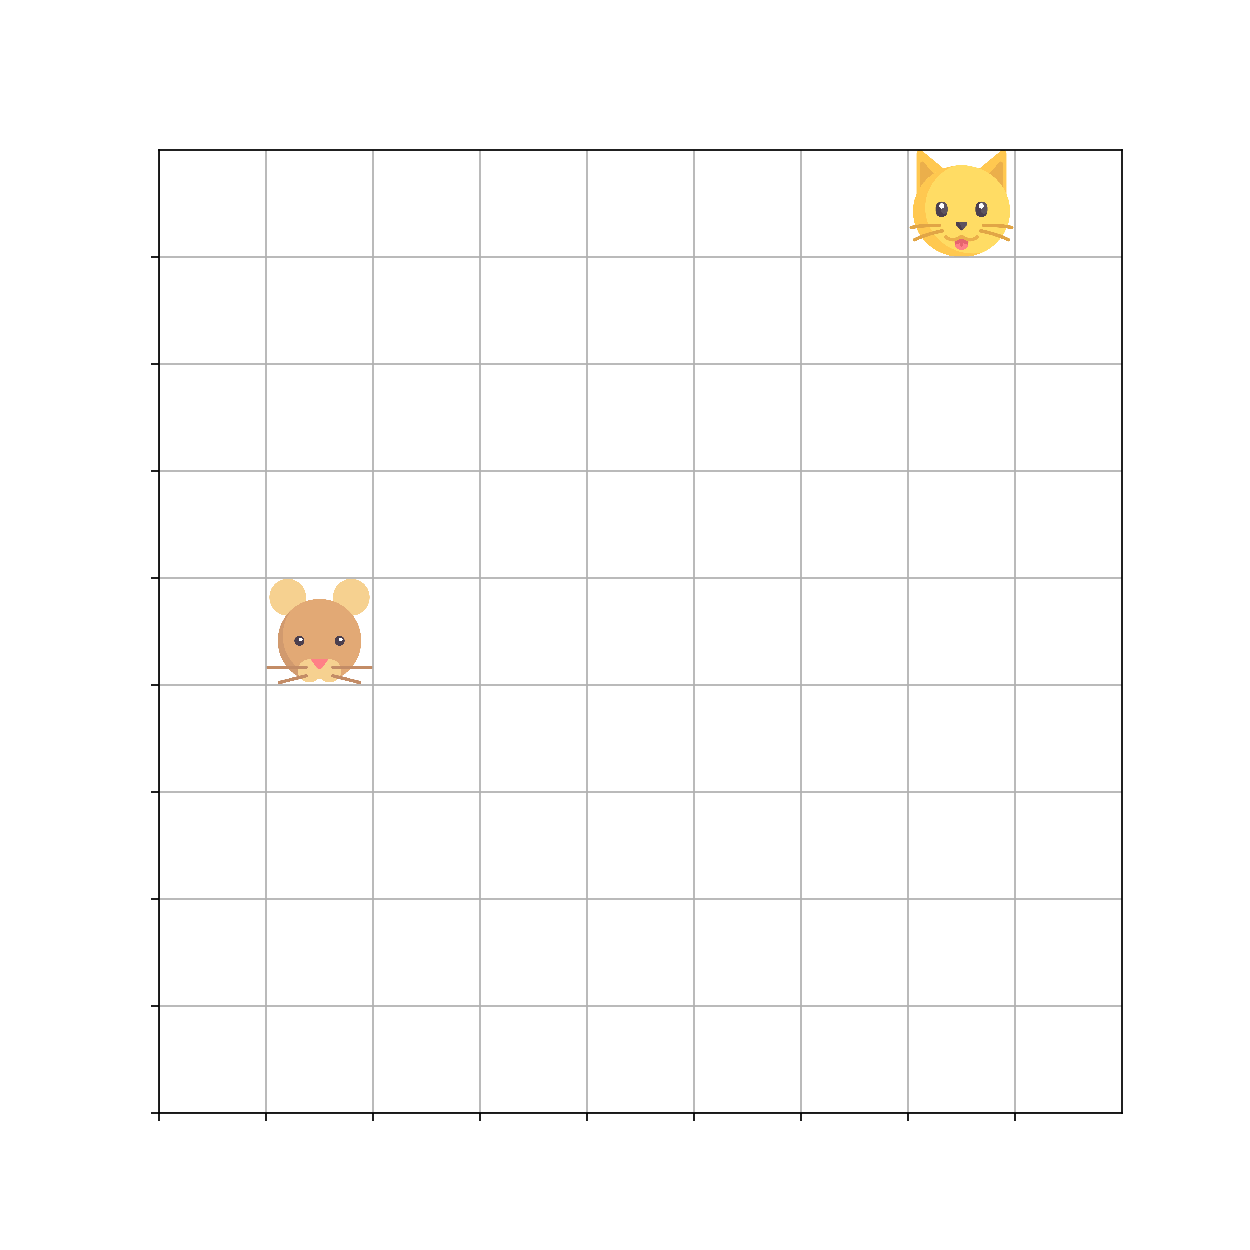

In [4]:
R = np.zeros((grid_size, grid_size, grid_size, grid_size))
e = Environment()
cat = Cat(R, e)
mouse = Mouse(e)
e.reset(cat, mouse)
e.print_state(cat, mouse)

iters = 0
iters_max = 25

while ((cat.x != mouse.x or cat.y != mouse.y) and iters < iters_max):
    mouse.move()
    e.print_state(cat, mouse)
    cat.move(mouse)
    e.print_state(cat, mouse)
    iters += 1


What is happening? Why is our cat bumping into the wall? Because it doesn't know that it is rewarded for catching the mouse. Now let's tell it that. We will punish the cat when it doesn't catch the mouse and reward it big time for catching the mouse.

### Engineering your first reward vector

Like all other machine learning techniques, knowing the algorithm is not enough to have good performance. One must also pick the appropriate inputs for the algorithm to perform optimally. In the case of regression, this could be clever feature engineering or feature selection. For classification models, this means careful attention to balancing recall and precision. And in RL, this requires engineering the reward vector. The reward vector is how you, the human, convey to the agent what is desireable and what is not. The agent sees its world through the eyes of rewards and its sole quest in life is to maximize them. As such, your goal is to convey reality to the agent through the rewards vector. The best way to design rewards is as follows:

1. Start with the easy terminal states. Terminal states are states when the game is over. They normally have pretty clear payoffs. In AlphaZero, they use +1 for a win, 0 for a draw, and -1 for a loss. In real-world applications, the rewards are what you are trying to optimize: clicks, time on app, profit, etc.

2. Once you have the terminal states, work your way backwards. For intermediate steps, think of what **your** strategy would be. If you are confident that your strategy is optimal, you can transmit this knowledge to the agent by giving it a reward for picking your action and penalizing it for picking the others.

3. The final thing you should consider is cumulative rewards. They are used to influence the agent when things are time dependent. Suppose you want something done as fast as possible - then you should penalize (negative reward) your agent for every passing turn. Without the accumulating penalties, the agent doesn't care if it takes a microsecond or a million years to receive the reward at the end. In both cases, with only the terminal reward, it perceives it as the same amount. The reason why you perform this step last is because cumulative rewards, if not capped relative to other rewards, can yield weird things like [this](https://www.youtube.com/watch?v=uVHAAiA3F_U).

### Question:

How do these apply to our cat and mouse game?

---------

### Exercise 5:

Code a rewards matrix that rewards the cat massively for catching the mouse and punishes it otherwise.

**Answer.**

---------

Let's run our simulator again:

<IPython.core.display.Javascript object>


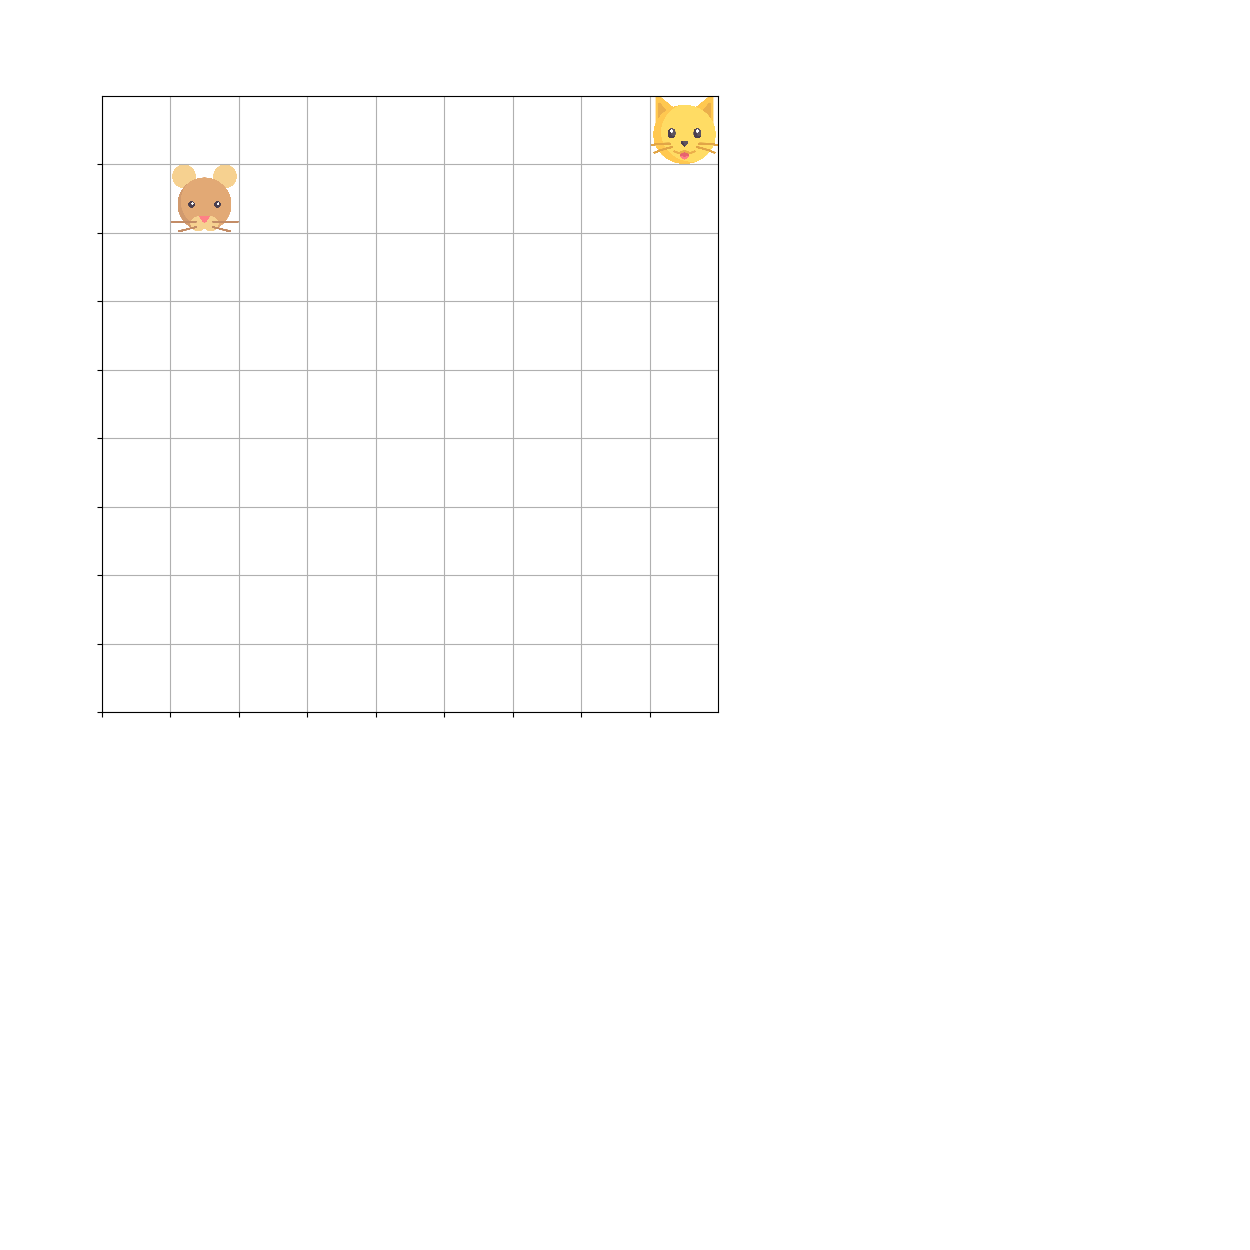

In [5]:
e = Environment()
cat = Cat(R, e)
mouse = Mouse(e)
e.reset(cat, mouse)
e.print_state(cat, mouse)

iters = 0
iters_max = 20

while ((cat.x != mouse.x or cat.y != mouse.y) and iters < iters_max):
    mouse.move()
    e.print_state(cat, mouse)
    cat.move(mouse)
    e.print_state(cat, mouse)
    iters += 1


It might look like the cat has not learned anything. But remember, this is the first time it is playing the game. It doesn't know how to win. Now let's have the cat do this 200 times and see if it learns over time:

<IPython.core.display.Javascript object>


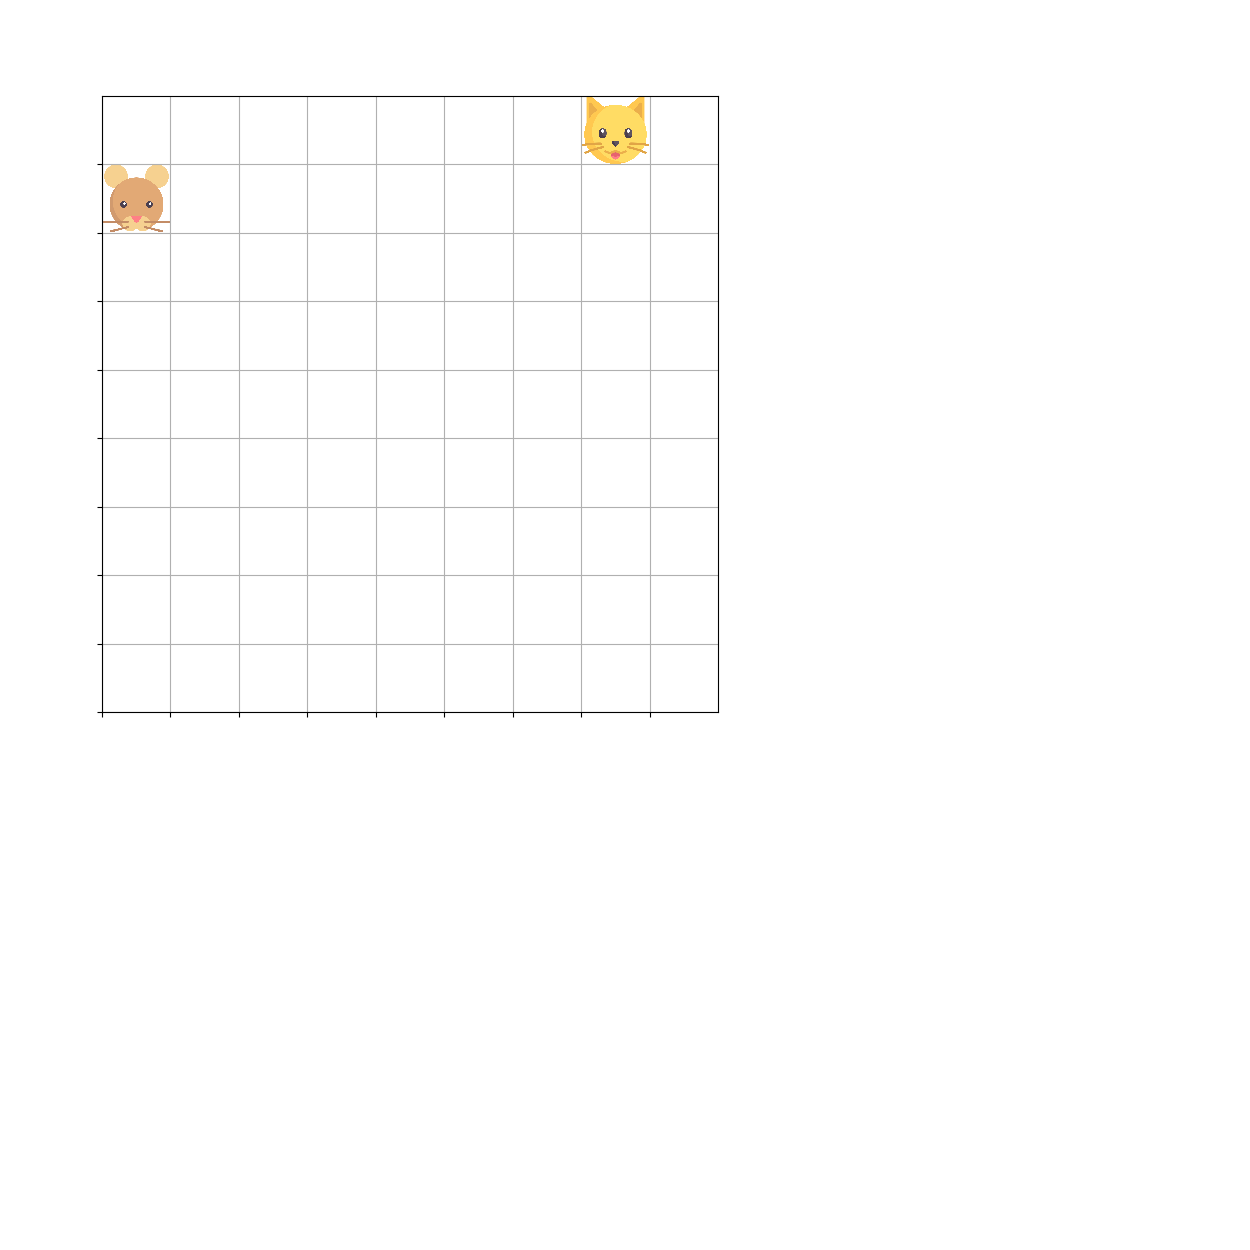

In [6]:
n_iters = 200
e = Environment()
cat = Cat(R, e)
mouse = Mouse(e)

iters = 0
max_iters = 100

# Train the cat first
for i in range(n_iters):
    e.reset(cat, mouse)

    while ((cat.x != mouse.x or cat.y != mouse.y) and iters < max_iters):
        mouse.move()
        cat.move(mouse)
        iters += 1
       
cat.epsilon = 0
e.reset(cat, mouse)
e.print_state(cat, mouse)

iters = 0
max_iters = 25

while ((cat.x != mouse.x or cat.y != mouse.y) and iters < max_iters):
    mouse.move()
    e.print_state(cat, mouse)
    cat.move(mouse)
    e.print_state(cat, mouse)
    iters += 1
    

Unfortunately, the cat still performs pretty badly. It doesn't seem to know that being close to the mouse is essential for catching it. Eventually it will learn this, but we don't have that much time to wait. Can we come up with a better rewards matrix to help the cat learn faster?

### Exercise 6:

Make a better reward function that helps the cat realize it needs to be close to the mouse to catch it.

**Answer.**

---------

Now let's run our simulator again:

<IPython.core.display.Javascript object>


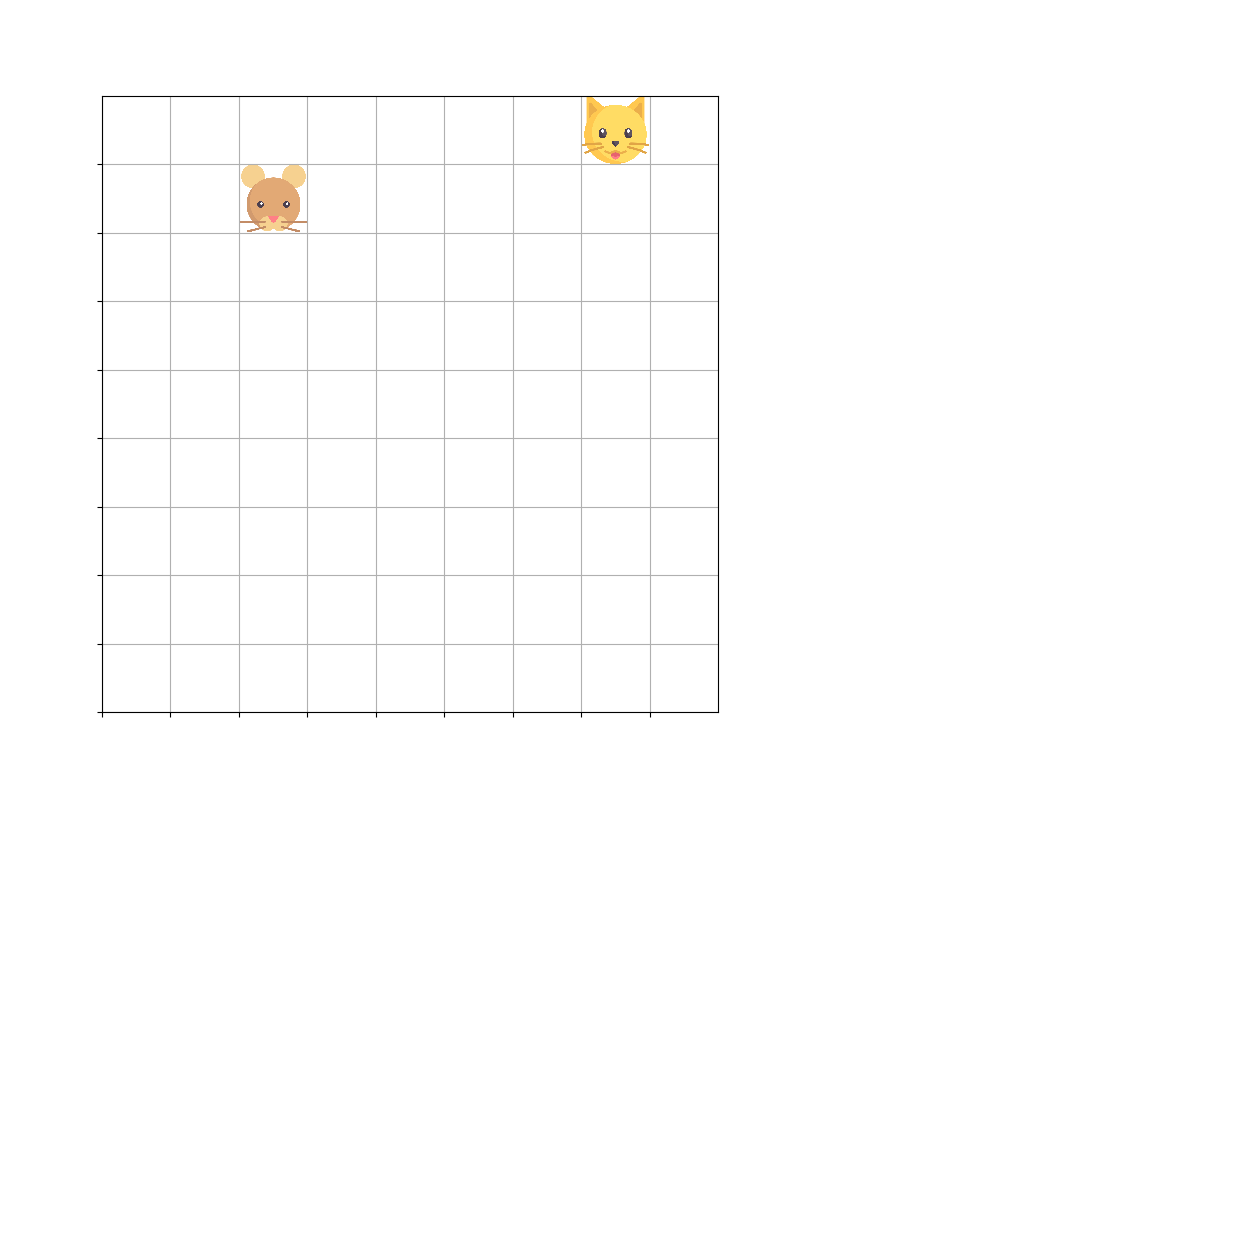

In [7]:
n_iters = 200
e = Environment()
cat = Cat(R, e)
mouse = Mouse(e)

iters = 0
max_iters = 100

# Train the cat first
for i in range(n_iters):
    e.reset(cat, mouse)

    while ((cat.x != mouse.x or cat.y != mouse.y) and iters < max_iters):
        mouse.move()
        cat.move(mouse)
        
cat.epsilon = 0
e.reset(cat, mouse)
e.print_state(cat, mouse)

iters = 0
max_iters = 25

while ((cat.x != mouse.x or cat.y != mouse.y) and iters < max_iters):
    mouse.move()
    e.print_state(cat, mouse)
    cat.move(mouse)
    e.print_state(cat, mouse)
    iters += 1

Can you see the difference in behavior of the cat? It is now being guided towards the mouse because it now understands that being close to the mouse is better than being far from it, even if it has not yet caught the mouse. It is so much better that twice the amount of training takes a fraction of the time.

### Question:

What do you think would happen if we used L1 distance instead of L2?

---------

Reinforcement learning has huge advantages over other machine learning algorithms. It allows us to simply encode the reward function once and then even if the environment changes, the algorithm just has to relearn the environment. This is handy in settings where the environment is noisy and always subject to change (e.g. consumer behavior, weather dependent systems, etc.)

For example, let's move the mouse to the top right-hand corner and prevent the cat and mouse from moving outside the perimeter:

In [8]:
class Environment_Edges():
    
    fig, ax = None, None
    
    def reset(self, cat, mouse):
        cat.x = 0
        cat.y = 0
        mouse.x = grid_size-1
        mouse.y = grid_size-1
    
    def get_possible_moves(self, x, y):
        possible_moves = []
        if x < grid_size-1 and y in [0, grid_size-1]:
            possible_moves.append(0)
        if y < grid_size-1 and x in [0, grid_size-1]:
            possible_moves.append(1)
        if x > 0 and y in [0, grid_size-1]:
            possible_moves.append(2)
        if y > 0 and x in [0, grid_size-1]:
            possible_moves.append(3)
            
        return possible_moves
        
    def print_state(self, cat, mouse):
        
        if self.fig is None:
            self.fig, self.ax = plt.subplots(figsize=(8,8))
        
        cat_img = mpimg.imread('./cat.png')
        mouse_img = mpimg.imread('./mouse.png')
        wall_img = mpimg.imread('./brick-wall.png')
        
        icon_size = 50
        
        self.ax.clear()
        self.ax.imshow(mouse_img, extent=[mouse.x*icon_size, (mouse.x+1)*icon_size, mouse.y*icon_size, (mouse.y+1)*icon_size])
        self.ax.imshow(cat_img, extent=[cat.x*icon_size, (cat.x+1)*icon_size, cat.y*icon_size, (cat.y+1)*icon_size])
        plt.imshow(wall_img, extent=[icon_size, (grid_size-1)*icon_size, icon_size, (grid_size-1)*icon_size])
        self.ax.set_ylim([0, grid_size*icon_size])
        self.ax.set_xlim([0, grid_size*icon_size])
        
        grid_lines = [50*x for x in range(grid_size)]
        self.ax.xaxis.set_ticks(grid_lines)
        self.ax.yaxis.set_ticks(grid_lines)
        self.ax.grid()
        self.ax.xaxis.set_ticklabels([])
        self.ax.yaxis.set_ticklabels([])
        self.fig.canvas.draw()

<IPython.core.display.Javascript object>


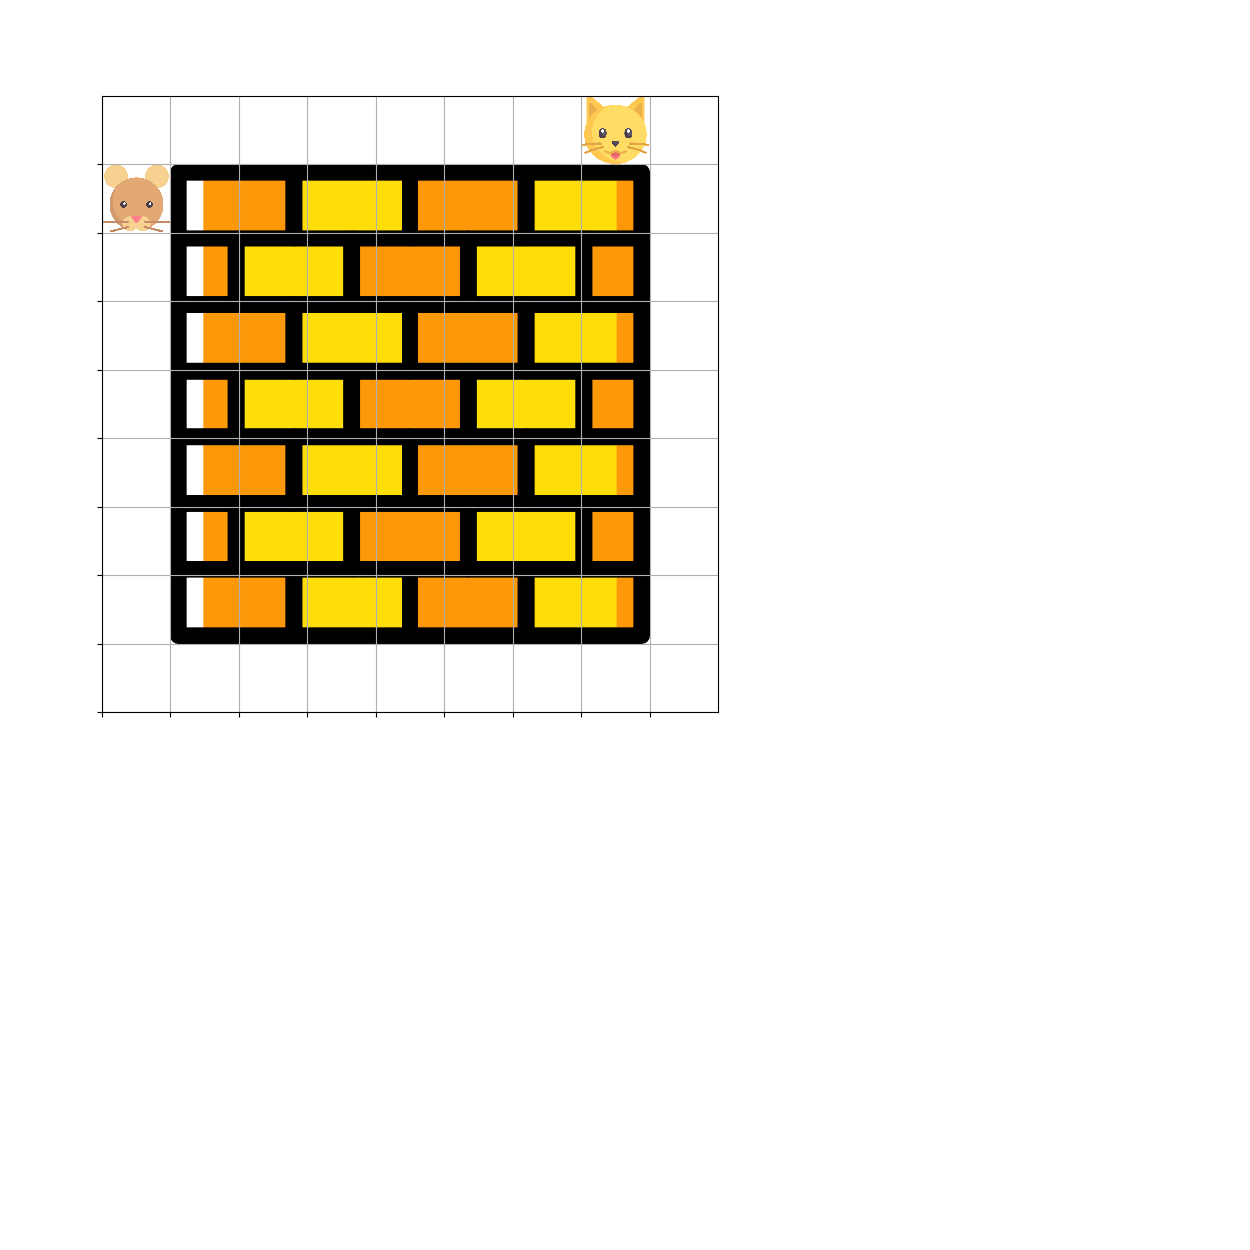

In [9]:
n_iters = 200
e = Environment_Edges()
cat = Cat(R, e)
mouse = Mouse(e)

iters = 0
max_iters = 100

for i in range(n_iters):
    e.reset(cat, mouse)

    while ((cat.x != mouse.x or cat.y != mouse.y) and iters < max_iters):
        mouse.move()
        cat.move(mouse)
        iters += 1
        
cat.epsilon = 0
e.reset(cat, mouse)
e.print_state(cat, mouse)

iters = 0
max_iters = 25

while ((cat.x != mouse.x or cat.y != mouse.y) and iters < max_iters):
    mouse.move()
    e.print_state(cat, mouse)
    cat.move(mouse)
    e.print_state(cat, mouse)
    iters += 1

### Exercise 7:

Let's now upgrade the mouse. Make the mouse move in a more intelligent manner, where it is aware of and responds to the location of the cat, and see if the cat still learns effectively.

**Answer.**

---------

In [10]:
n_iters = 250
e = Environment()
cat = Cat(R, e)
mouse = Mouse(e)

iters = 0
max_iters = 100

for i in range(n_iters):
    e.reset(cat, mouse)

    while ((cat.x != mouse.x or cat.y != mouse.y) and iters < max_iters):
        mouse.move(cat)
        cat.move(mouse)
        iters += 1

cat.epsilon = 0
e.reset(cat, mouse)
e.print_state(cat, mouse)

iters = 0
max_iters = 25

while ((cat.x != mouse.x or cat.y != mouse.y) and iters < max_iters):
    mouse.move(cat)
    e.print_state(cat, mouse)
    cat.move(mouse)
    e.print_state(cat, mouse)
    iters += 1

TypeError: move() takes 1 positional argument but 2 were given

## Using reinforcement learning for optimal promotion placement

Now that we have gone through the whole process of implementing a reinforcement learning algorithm for a simple (but fun!) example, let's move on to our main problem: modeling promotion placement on a website as a game. That is, we will have users move through our website, and our goal is to sell them products by giving them a 20% off promotion. Our website will be a cycling website with 5 major categories:

1. inexpensive bicycles: average retail price \$300
2. intermediate bicycles: average retail price \$1,000
3. luxury bicycles: average retail price \$5,000
4. accessories: average retail price \$50
5. tires: average retail price \$100

Furthermore, we will have a variety of users; there will be:

1. browsers: these people are "just looking" but may be swayed by a promotion
2. dreamers: people with no intent to buy
3. accessory shoppers: people looking to buy accessories
4. tire shoppers: people looking to buy tires (if they are looking for tires, they probably got a flat tire recently)
5. impulse buyers: people who are just looking for a deal

Note that we do not know the identity of any individual user who comes to our platform - we only know that they fall into one of the above five categories.

Again, we need a state space and an action space. In this "game", our state space will be the history of the shopper (the last 5 pages they visited), and the action space is either showing or not showing the promotion on the current page. The Q-matrix and rewards matrix will be of shape 8 x 8 x 8 x 8 x 8 x 2. The 8 possible states are: 

- 0: no history
- 1: inexpensive page
- 2: medium page
- 3: luxury page
- 4: accessory page
- 5: tires page
- 6: bought the last page
- 7: left the store

This is repeated 5 times with the most recent one in the first location. The 2 actions are:

- 0: show no promotion
- 1: show promotion

For example, the state (6,3,2,1,0,0) means this:

- 6: the person bought the last page
- 3: the person was on the luxury page
- 2: the person was on the medium page, two pages ago
- 1: the person was on the inexpensive page, three pages ago
- 0: the person doesn't have a history this far
- 0: you did not show a promotion on the last page

Thus, the sale in this case would be $5,000.

In [ ]:
import numpy as np
from enum import Enum

class Environment():
    
    user_types = Enum('User Types', 'inexpensive_browser medium_browser luxury_browser dreamers accessory_shoppers tire_shoppers impulse_buyers')              
    categories = Enum('Categories', 'inexpensive medium luxury accessory tires')
    
    user_props = {
        user_types.inexpensive_browser: {
            'transitions': [0.7, 0.05, 0.05, 0.15, 0.05],
            'user_prob': 0.25,
            'leave_prob': 0.2,
            'buy_prob_no_prom': 0.01,
            'buy_prob_prom': 0.1
        },
        user_types.medium_browser: {
            'transitions': [0.05, 0.7, 0.05, 0.15, 0.05],
            'user_prob': 0.10,
            'leave_prob': 0.2,
            'buy_prob_no_prom': 0.01,
            'buy_prob_prom': 0.1
        },
        user_types.luxury_browser: {
            'transitions': [0.0, 0.05, 0.8, 0.0, 0.15],
            'user_prob': 0.01,
            'leave_prob': 0.3,
            'buy_prob_no_prom': 0.05,
            'buy_prob_prom': 0.5
        },
        user_types.dreamers: {
            'transitions': [0.25, 0.25, 0.25, 0.10, 0.15],
            'user_prob': 0.20,
            'leave_prob': 0.1,
            'buy_prob_no_prom': 0.0,
            'buy_prob_prom': 0.01
        },
        user_types.accessory_shoppers: {
            'transitions': [0.0, 0.0, 0.0, 0.80, 0.2],
            'user_prob': 0.25,
            'leave_prob': 0.5,
            'buy_prob_no_prom': 0.25,
            'buy_prob_prom': 0.5
        },
        user_types.tire_shoppers: {
            'transitions': [0.0, 0.0, 0.0, 0.80, 0.2],
            'user_prob': 0.10,
            'leave_prob': 0.5,
            'buy_prob_no_prom': 0.25,
            'buy_prob_prom': 0.5
        },
        user_types.impulse_buyers: {
            'transitions': [0.25, 0.25, 0.0, 0.25, 0.25],
            'user_prob': 0.09,
            'leave_prob': 0.3,
            'buy_prob_no_prom': 0.05,
            'buy_prob_prom': 1.0
        }
    }
    
    category_props = {
        categories.inexpensive: {
            'sale_price': 300,
            'cost': 50
        },
        categories.medium: {
            'sale_price': 1000,
            'cost': 300
        },
        categories.luxury: {
            'sale_price': 5000,
            'cost': 4500
        },
        categories.accessory: {
            'sale_price': 50,
            'cost': 25
        },
        categories.tires: {
            'sale_price': 100,
            'cost': 10
        }
    }
    
    def __init__(self):
        self.current_state = [0]*5
    
        # 8 possible states (5 categories + 1 no history + 1 buy + 1 leave) x 5 historical states
        # 2 possible actions

        self.Q = np.zeros((8,8,8,8,8,2))
        self.R = np.zeros((8,8,8,8,8,2))
        self.alpha = 0.5
        self.gamma = 1.0
        self.epsilon = 0.05
    
    def simulate_day(self, seed):
        # a random day consists of 1,000 users browsing the website
        iters = 1000
        u = []
        p = []
        
        for user_type in self.user_types:
            u.append(user_type)
            p.append(self.user_props[user_type]['user_prob'])
            
        profit = 0
        
        # make sure runs are consistent
        np.random.seed(seed)
        
        for i in range(iters):
            user_type = np.random.choice(u, p=p)
            
            # start the user somewhere on the website
            next_state = np.random.choice(self.categories, p=self.user_props[user_type]['transitions'])
            
            self.current_state[1:] = self.current_state[0:4]
            self.current_state[0] = next_state.value
            
            # user moves through website until it leaves or buys something
            while True:
                
                prom = self.show_promotion()
                
                if prom == 0:
                    buy_prob = self.user_props[user_type]['buy_prob_no_prom']
                else:
                    buy_prob = self.user_props[user_type]['buy_prob_prom']
                    
                buy = np.random.choice([True, False], p=[buy_prob, 1-buy_prob]) 
                Q_idx = tuple(self.current_state.copy()+[prom])
                
                if buy:
                    next_Q_idx = tuple([6]+self.current_state[0:4]+[prom])
                    R_idx = tuple([6]+self.current_state[0:4]+[prom])
                    self.Q[Q_idx] = (1-self.alpha)*self.Q[Q_idx]+self.alpha*(self.R[R_idx]+self.gamma*self.Q[next_Q_idx])
                    
                    # need to add profit to running total
                    sale = self.category_props[next_state]['sale_price']
                    profit += 0.8*sale if prom else sale
                    profit -= self.category_props[next_state]['cost']
                    break
                else:
                    # if no buy, then randomly might leave
                    leave_prob = self.user_props[user_type]['leave_prob']
                    leave = np.random.choice([True, False], p=[leave_prob, 1-leave_prob])
                    
                    if leave:
                        next_Q_idx = tuple([7]+self.current_state[0:4]+[prom])
                        R_idx = tuple([7]+self.current_state[0:4]+[prom])
                        self.Q[Q_idx] = (1-self.alpha)*self.Q[Q_idx]+self.alpha*(self.R[R_idx]+self.gamma*self.Q[next_Q_idx])
                        break
                
                next_state = np.random.choice(self.categories, p=self.user_props[user_type]['transitions'])
                self.current_state[1:] = self.current_state[0:4]
                self.current_state[0] = next_state.value
                
                next_Q_idx = tuple(self.current_state)
                R_idx = tuple(self.current_state+[prom])
                
                self.Q[Q_idx] = (1-self.alpha)*self.Q[Q_idx]+self.alpha*(self.R[R_idx]+self.gamma*self.Q[next_Q_idx].mean())
    
                        
        return profit
                    
    def show_promotion(self):
        
        state = self.current_state
        max_value = -np.inf
        action = None
        
        # epsilon greedy strategy
        greedy = np.random.choice([True, False], p=[1-self.epsilon, self.epsilon])
        
        if greedy:
            for i in [0,1]:

                Q_idx = tuple(state.copy()+[i])            
                value = self.Q[Q_idx]

                if value > max_value:
                    max_value = value
                    action = i
        else:
            action = np.random.choice([0,1])
        
        return action

In [ ]:
def test(R):
    e = Environment()
    e.R = R
    iterations = 100

    # train over 100 days
    for i in range(iterations):
        
        if i % 10 == 0:
            print(f"Day {i} complete")
        profit = e.simulate_day(i)
        
    # test on a common week
    e.epsilon = 0
    profit = 0
    n_days = 5

    for i in range(n_days):
        profit += e.simulate_day(iterations+i)

    print(f'The {n_days} days profit on the test set was: {profit/n_days}')

This testing function simulates 100 days of sales. The simulator takes a couple of minutes to complete the training. However, if you were to train this algorithm in real life, it would take 100 days. This is another reason why simulators are important. Even if they are not accurate, you are able to quickly train your algorithm and gain insight into the problem.

### Exercise 8: Competition!

Design a rewards matrix that performs well on the test set. Remember that $R$ has the shape 8 x 8 x 8 x 8 x 8 x 2, and use the `test(R)` function. This test takes a couple of minutes to run! Here is an example reward function to get you started, which rewards the agent for making a sale:

```python
categories = Enum('Categories', 'inexpensive medium luxury accessory tires')
prices = Enum('Prices', '300 1000 5000 50 100')
R = np.zeros((8,8,8,8,8,2))

for category, price in zip(categories, prices):
    R[6,category.value,:,:,:,:] = int(price.value)
```

**Answer.**

---------

## Conclusions

In this case, we learned about reinforcement learning in the context of a simple example, then practiced our new knowledge by applying it to a real scenario. We learned that reinforcement learning is not a magical black box that learns anything we throw at it. It requires careful insight into the problem to design an appropriate rewards matrix that guides our learning agent in a meaningful way. However, it can be an incredible technique when applied correctly - we were able to boost sales by over 25%!

## Takeaways

Reinforcement learning is a useful tool when you can interact with a complex environment. As a reminder, it **should not** be used where this interaction is costly to you! For example, you would not use RL to learn how to drive a car because it would require repeatedly crashing the car in different ways, which is very bad.

We also learned a few helpful rules for designing a good rewards matrix:

1.  Start with the easy terminal states. Usually there is a clear reward for a winning state and for a losing state. That is, if you get 100 points for winning and lose the game by dying, your winning reward should be 100 and dying should be a large negative number (much worse than winning). This is a good starting point.

2. Think about the steps in the middle and use your human intuition to pick rewards. Like the cat and mouse game, if there is an obvious metric (distance to the mouse), the rewards/penalty should be proportional to this metric. Be careful though, because if your intuition is wrong, then that can lead your agent astray.

3. Cumulative rewards are a good way to give your agent urgency or a will to survive as long as possible. However, when not designed properly, then the agent will be better off collecting these passive rewards and it will do so, instead of attempting to win the game as quickly as possible.

Finally, an RL algorithm needs to practice in the real environment to learn. This has real human timescale considerations. For example, we simulated 100 days of e-commerce days. In the real world, this takes 100 days. So it is better to slown down and spend extra hours thinking about the best rewards matrix than to rush getting a bad algorithm out the door.